In [1]:
# --- Class Balancing (Hewa V.S.S/ IT24104049) ---
# Heart Disease Prediction Model - Data Preprocessing
# ===================================
# STEP 1: LOAD DATA AND CHECK TARGET
# ===================================

import pandas as pd

# Load the dataset
df = pd.read_csv("heart.csv")   # Change file name if needed

# Show all column names (to find your target column)
print("Columns in the dataset:")
print(df.columns)

# Check how many samples are in each class (assuming the target column is 'target')
print("\nClass distribution BEFORE balancing:")
print(df['target'].value_counts())


Columns in the dataset:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Class distribution BEFORE balancing:
target
1    526
0    499
Name: count, dtype: int64


In [2]:
# ===================================
# STEP 2: BALANCE DATA WITH SMOTE
# ===================================

from imblearn.over_sampling import SMOTE

# Separate features (X) and target labels (y)
X = df.drop('target', axis=1)
y = df['target']

# Create SMOTE object
smote = SMOTE(random_state=42)

# Fit SMOTE and resample the dataset
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# Show the new class distribution after SMOTE
print("\nClass distribution AFTER SMOTE oversampling:")
print(pd.Series(y_resampled_smote).value_counts())



Class distribution AFTER SMOTE oversampling:
target
0    526
1    526
Name: count, dtype: int64


In [3]:
# ===================================
# STEP 3: BALANCE DATA WITH UNDERSAMPLING
# ===================================

from imblearn.under_sampling import RandomUnderSampler

# Create undersampling object
undersample = RandomUnderSampler(random_state=42)

# Fit undersampler and resample the dataset
X_resampled_under, y_resampled_under = undersample.fit_resample(X, y)

# Show the new class distribution after undersampling
print("\nClass distribution AFTER Random Undersampling:")
print(pd.Series(y_resampled_under).value_counts())



Class distribution AFTER Random Undersampling:
target
0    499
1    499
Name: count, dtype: int64


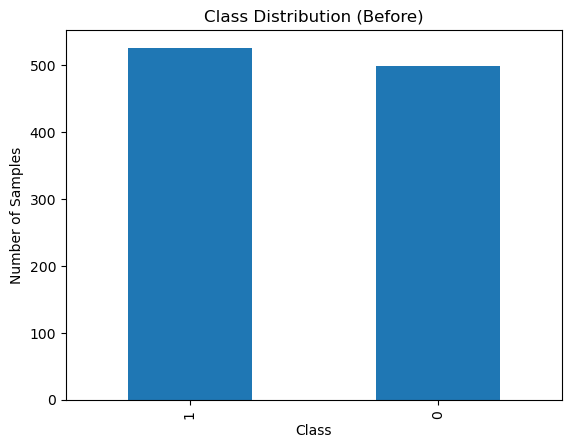

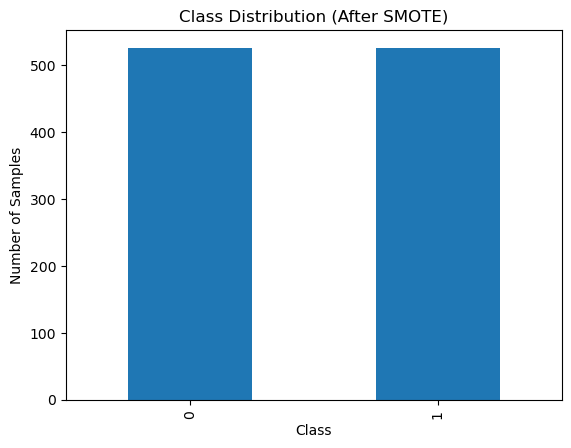

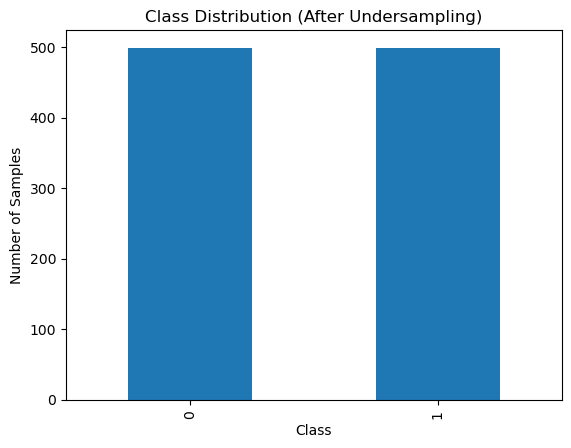

In [4]:
# ===================================
# STEP 4: VISUALIZE CLASS DISTRIBUTION
# ===================================

import matplotlib.pyplot as plt

# --- Before balancing ---
df['target'].value_counts().plot(kind='bar', title='Class Distribution (Before)')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()

# --- After SMOTE ---
pd.Series(y_resampled_smote).value_counts().plot(kind='bar', title='Class Distribution (After SMOTE)')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()

# --- After Undersampling ---
pd.Series(y_resampled_under).value_counts().plot(kind='bar', title='Class Distribution (After Undersampling)')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()
